In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [2]:
marks=pd.read_csv('marks.txt',header=None)

In [3]:
X=marks.iloc[:,:2]
Y=marks.iloc[:,-1]

In [4]:
Y

0     0
1     0
2     0
3     1
4     1
5     0
6     1
7     1
8     1
9     1
10    0
11    0
12    1
13    1
14    0
15    1
16    1
17    0
18    1
19    1
20    0
21    1
22    0
23    0
24    1
25    1
26    1
27    0
28    0
29    0
     ..
70    0
71    1
72    1
73    1
74    1
75    1
76    1
77    1
78    0
79    0
80    1
81    1
82    1
83    1
84    1
85    1
86    0
87    1
88    1
89    0
90    1
91    1
92    0
93    1
94    1
95    1
96    1
97    1
98    1
99    1
Name: 2, Length: 100, dtype: int64

In [21]:
admitted=marks.loc[Y==1]
not_admitted=marks.loc[Y==0]


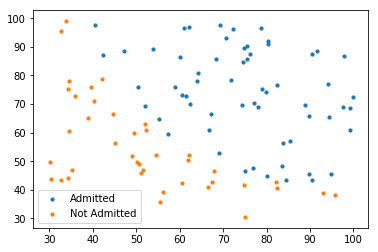

In [26]:
plt.scatter(admitted.iloc[:,0],admitted.iloc[:,1],s=10,label='Admitted')
plt.scatter(not_admitted.iloc[:,0],not_admitted.iloc[:,1],s=10,label='Not Admitted')
plt.legend()
plt.show()

In [5]:
x_train1,x_test1,y_train1,y_test1=train_test_split(X,Y, test_size=0.20,random_state=0)


In [6]:
# Model Intilization
reg=LogisticRegression()
#DataFitting
reg=reg.fit(x_train1,y_train1)
print(reg.coef_)
print(reg.intercept_)

[[0.03032132 0.03124498]]
[-3.4294559]


C:\Users\Abhi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [7]:
Y_pred=reg.predict(x_test1)
Y_pred

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1],
      dtype=int64)

In [8]:
cm=confusion_matrix(y_test1,Y_pred)
print("Confusion Matrix is:",cm, sep='\n')

Confusion Matrix is:
[[ 7  1]
 [ 0 12]]


In [9]:
print("LRR Score:", reg.score(x_test1,y_test1)*100)


LRR Score: 95.0


In [10]:
probs=reg.predict_proba(x_test1)
probs

array([[0.40071976, 0.59928024],
       [0.42315594, 0.57684406],
       [0.51616621, 0.48383379],
       [0.51429434, 0.48570566],
       [0.13486256, 0.86513744],
       [0.18539035, 0.81460965],
       [0.42245172, 0.57754828],
       [0.33457637, 0.66542363],
       [0.58626863, 0.41373137],
       [0.35121868, 0.64878132],
       [0.62141171, 0.37858829],
       [0.65379385, 0.34620615],
       [0.56664833, 0.43335167],
       [0.15097318, 0.84902682],
       [0.4255642 , 0.5744358 ],
       [0.33036689, 0.66963311],
       [0.59162222, 0.40837778],
       [0.25192999, 0.74807001],
       [0.42114915, 0.57885085],
       [0.16667003, 0.83332997]])

In [11]:
from sklearn import metrics
prob_postive=probs[:,1]
fpr, tpr, threshold= metrics.roc_curve(y_test1,prob_postive)
roc_auc=metrics.auc(fpr,tpr)
print('Area under the curve:',roc_auc)

Area under the curve: 0.9895833333333334


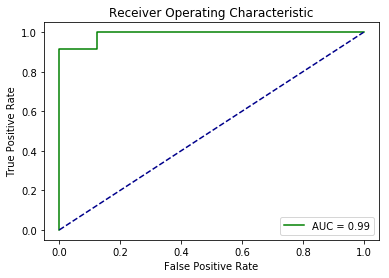

In [15]:
#plot roc curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,"green",label='AUC = %0.2f' % roc_auc)
plt.legend(loc= 'lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()